<b>Group Number: 5</b> 
<br><b>Name Group Member 1: Anton Sewergin</b> 
<br><b>u-Kürzel Group Member 1: uhsno</b> 
<br><b>Name Group Member 2: Jan Schmidgen</b> 
<br><b>u-Kürzel Group Member 2: utwub</b> 

# 3 K-Nearest Neighbors (KNN)

## What is KNN ?

Let’s first start by establishing some definitions and notations. We will use $x$ to denote a *feature* (aka. predictor, attribute) and $y$ to denote the *target* (aka. label, class) we are trying to predict.

KNN falls in the **supervised learning** family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations $(x,y)$ and would like to capture the relationship between $x$ and $y$. More formally, our goal is to learn a function $h:X→Y$ so that given an unseen observation $x, h(x)$ can confidently predict the corresponding output $y$.

## Introduction

In the classification setting, the K-nearest neighbor algorithm essentially boils down to forming a majority vote between the K most similar instances to a given “unseen” observation. Similarity is defined according to a distance metric between two data points. Instances given as $x = <a_1(x),a_2(x),...,a_n(x)>$ are represented as points in the n-dimensional space $\mathbb{R}^n$. Their relationships/distances can be formulated as the euclidean distance:

\begin{equation}
d(x_i,x_j) \equiv \sqrt{\sum_{r=1}^{n} (a_r(x_i) - a_r(x_j))^2}
\end{equation}

In this case the distance metric is chosen to be the Euclidean distance, that is a popular choice. Other distance metrics may be more suitable for a given setting, including the Manhatten, Chebyshev and Hamming distance. 

A function $h$ is then learned from $\mathbb{R}^n$ $\rightarrow$ $V$, $V$ being a finite set of all possible classes. 

### Algorithm

For every given instance $x_i$ add it to the list of training_examples. 

**Inference:**

A new instance $x_q$ needs to be classified and $x_1,...,x_k$ are the $k$ closest instances to $x_q$ (known after computing all distances between training examples and the new instance). Note that $K$ is usually odd to prevent tie situations.
Then the new classification of $x_q$ is given by:

\begin{equation}
h(x_q) \leftarrow arg\max_{v \in V}\sum_{i=1}^{k}\delta (v,y_i)
\end{equation}

with 
\begin{equation}
\delta (a,b) = \begin{cases}
1, \text{if } a=b \\
0, else
\end{cases}
\end{equation}
 
### Example: 

Classification with $K=5$:

<img src="images/knn_5.png" width="800">

__$\rightarrow$The new instance is classified as a square.__

Classification with $K=1$:
<img src="images/knn_1.png" width="800">

__$\rightarrow$The new instance is classified as a triangle.__ 




If $k = 1$ the decision boundaries will end up being the same as in a [Voronoi](https://en.wikipedia.org/wiki/Voronoi_diagram) diagram. Whereas using circles the perspective is to find the next K nearest points to the new instance, a Voronoi shows regions, in which new instances are assigned to the known data points. (The perspective is now on the squares and triangles that will assign new points next to them to their class.)

**Additional Information:**

- In general it is often useful to normalize the input vectors so that input dimensions are not skewed so much.

- There is the possibility to use distance based weights for instances rather than uniformly taking known instances into consideration. Therefore the equation given above changes to:

    \begin{equation}
    f(x_q) \leftarrow arg\max_{v \in V}\sum_{i=1}^{k} w_i \delta (v,c(x_i))
    \end{equation}

    and the weights are given by:

    \begin{equation}
     w_i \equiv \frac{1}{d(x_q,x_i)^2}
    \end{equation}
    
- __Cover and Hart 1967__: As $n \rightarrow \infty$, the 1-NN error is no more than twice the error of the Bayes Optimal classifier.(Similar guarantees hold for k>1.) [Source](http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html)

- __Curse of dimensionality__: The inductive bias the K-NN algorithm makes is, that similar points share labels. In high dimensional spaces this assumption holds not as good as lower dimensional spaces. This is because, points are not close to each other if drawn uniformly in every dimension. See also: [Source](http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html)

- Reduce high dimensional data by PCA or SVD, intrinsic dimensions of the data should be lower dimensional or do not make use of all dimensions the data is given in

- K-NN algorithm becomes slow as n or the dimensions d increase, not feasible inference time

- K-NN algorithm becomes more accurate as n increases

# Imports

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

from typing import *

from lama.checkpoints import lama_compare_checkpoint


## 3.1 Load the datasets

<div class="alert alert-block alert-success">
<b>Task:</b> Load the prepared datasets training and test set, because we are only going to use GridSearchCV

</div>

In [2]:
x_train: pd.DataFrame
x_test: pd.DataFrame
y_train: pd.Series
y_test: pd.Series

# STUDENT CODE HERE (2pt)

train = pd.read_csv("data/train_prepared.csv")
test = pd.read_csv("data/test_prepared.csv")

x_train = train.drop(columns="Survived")
y_train = train["Survived"]

x_test = test.drop(columns="Survived")
y_test = test["Survived"]

# STUDENT CODE until HERE

# Sanity check
assert len(x_train.columns) == 8, f'Number of features expected was 8, but found {len(x_train.columns)} and {len(x_val.columns)} features.'
assert len(x_train) == 891, f'Number of samples expected in the train datasets is 891, but found {len(x_train)} and {len(x_train)} samples.'

<div class="alert alert-block alert-success">
<b>Task:</b> Normalize the train and test data with Min Max Scaling. You may not use a MinMaxScaler from scikit, since we have to ensure that the data type is still a Pandas dataframe, due to visualization later in this notebook. Watch out for variable names, when the cell is executed several times.
</div>

In [3]:
# Normalize the data
''' pay attention that you only use the train data to normalize your test data. 
    Otherwise the model passively sees information from the test set, because it influences the values we use to normalize the data.
'''
# STUDENT CODE HERE (1pt)

max = x_train.max()
min = x_train.min()

x_test = (x_test - min) / (max - min)
x_train = (x_train - min) / (max - min)

print(x_train)
print(x_test)

# STUDENT CODE until HERE

assert (x_train['Age'].max() == 1) ^ (x_test['Age'].max() == 1), f'Expected either train or test set to be fitted for scaling.'


     Pclass  Sex     Age     Parch      Fare  Name_length  Fare_log  Fare_bin
0       1.0  0.0  0.2750  0.000000  0.014151     0.000000  0.317521       0.0
1       0.0  1.0  0.4750  0.000000  0.139136     1.000000  0.683873       1.0
2       1.0  1.0  0.3250  0.000000  0.015469     0.000000  0.331789       0.0
3       0.0  1.0  0.4375  0.000000  0.103644     1.000000  0.636672       1.0
4       1.0  0.0  0.4375  0.000000  0.015713     0.333333  0.334298       0.0
..      ...  ...     ...       ...       ...          ...       ...       ...
886     0.5  0.0  0.3375  0.000000  0.025374     0.000000  0.411118       0.0
887     0.0  1.0  0.2375  0.000000  0.058556     0.333333  0.545154       1.0
888     1.0  1.0  0.5250  0.333333  0.045771     0.666667  0.505672       1.0
889     0.0  0.0  0.3250  0.000000  0.058556     0.000000  0.545154       1.0
890     1.0  0.0  0.4000  0.000000  0.015127     0.000000  0.328210       0.0

[891 rows x 8 columns]
     Pclass  Sex     Age     Parch      

In [4]:
# Imports the necessary modules

from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from matplotlib.colors import ListedColormap
num_neighbors = 1
radius = 100

"The k-neighbors classification in KNeighborsClassifier is the most commonly used technique. The optimal choice of the value is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.

In cases where the data is not uniformly sampled, radius-based neighbors classification in RadiusNeighborsClassifier can be a better choice. The user specifies a fixed radius , such that points in sparser neighborhoods use fewer nearest neighbors for the classification. For high-dimensional parameter spaces, this method becomes less effective due to the so-called “curse of dimensionality”.

The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. This can be accomplished through the weights keyword. The default value, weights = 'uniform', assigns uniform weights to each neighbor. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied to compute the weights." [Source](https://scikit-learn.org/stable/modules/neighbors.html)

In [5]:
neigh = KNeighborsClassifier(n_neighbors=num_neighbors)
neigh.fit(x_train, y_train)

neigh_r = RadiusNeighborsClassifier(radius)
neigh_r.fit(x_train, y_train)

print(f'Test score of K-Nearest Neighbor: {neigh.score(x_test, y_test)}')
print(f'Test score of K-Nearest Neighbor with radius: {neigh_r.score(x_test, y_test)}')

Test score of K-Nearest Neighbor: 0.7607655502392344
Test score of K-Nearest Neighbor with radius: 0.6363636363636364


## 3.2 Optimization

In [6]:
from sklearn.model_selection import GridSearchCV

### 3.2.1 Find the optimal number of neighbors for the Conventional Classifier (KNN)

<div class="alert alert-block alert-success">
<b>Task:</b> 
<ul>
<li> Optimize not only with respect to one, but two parameters
<li> Optimize the k in nearest_n_arr as well as the weight distribution.
<li> Use GridSearchCV and a dictionary for k_params (In the KNN task you do not need to use StratifiedKfold, just use the parameter cv, which does a stratisfied fold but without the random_state parameter.)

</ul>
</div>

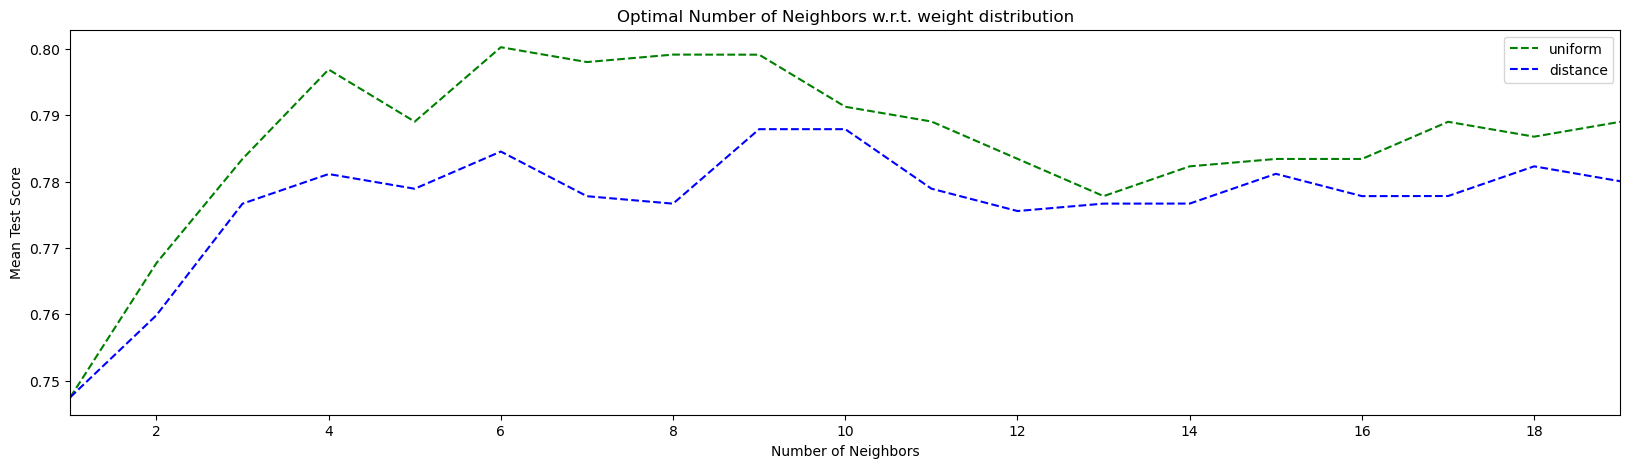

In [7]:
# Nearest Neighbors values to optimize the model
nearest_n_arr = range(1,20)  # natural numbers

# Necessary for plotting
length_a = len(nearest_n_arr)  

k_params: Dict[str, List[Any]]
k_model: GridSearchCV
    
# STUDENT CODE HERE (2pt)

weight_options = ['uniform', 'distance']

k_params = {"n_neighbors": nearest_n_arr, "weights": weight_options}
k_model = GridSearchCV(KNeighborsClassifier(), k_params, cv=5)
k_model.fit(x_train, y_train)

# STUDENT CODE until HERE


## Plot your results

neighourhood = k_params['n_neighbors']
scores = k_model.cv_results_['mean_test_score']
scores_std = k_model.cv_results_['std_test_score']

# Resorting for plots
scores = np.append(scores[0::2], scores[1::2])
scores_std = np.append(scores_std[0::2], scores_std[1::2])

neighourhood = k_params['n_neighbors']

plt.figure().set_size_inches(20, 5)
plt.xlabel('Number of Neighbors')
plt.xlim(neighourhood[0],neighourhood[-1])
plt.ylabel('Mean Test Score')
plt.plot(neighourhood, scores[:length_a],'g--',
        label='uniform')
plt.plot(neighourhood, scores[length_a:]
         , 'b--',label='distance')
plt.title('Optimal Number of Neighbors w.r.t. weight distribution')
plt.legend()

### 3.2.2 Get the best model

<div class="alert alert-block alert-success">
<b>Task:</b> 
<ul>
<li> Get the best parameters and the correspeonding score values.
<li> Print them! 
</ul>
</div>

In [8]:
# Get the params, and the test score of the best model, print the values

# STUDENT CODE HERE (3pt)

best_neighbors = k_model.best_params_["n_neighbors"]
best_weight = k_model.best_params_["weights"]
score = k_model.best_score_

print(f"Best number of neighbors: {best_neighbors}\n\
Best weight function: {best_weight}\n\
Best Score: {score}\n")

# STUDENT CODE until HERE


# compare your result with the checkpoint
lama_compare_checkpoint(best_neighbors, 't3/checkpoint3_1.pkl')

Best number of neighbors: 6
Best weight function: uniform
Best Score: 0.8002448057246878

Your data looks alright, you can continue with the workbook


True

### 3.2.3 Find the optimal radius for the RadiusClassifier

<div class="alert alert-block alert-success">
<b>Task:</b> 
<ul>
<li> Same as before: Name it k_r_model and use k_r_params (Look at next code block for consistency)
<li> Now optimize the dictionary with radius and weights
<li> You can choose if you want decimal steps or natural numbers for radii.
</ul>
</div>

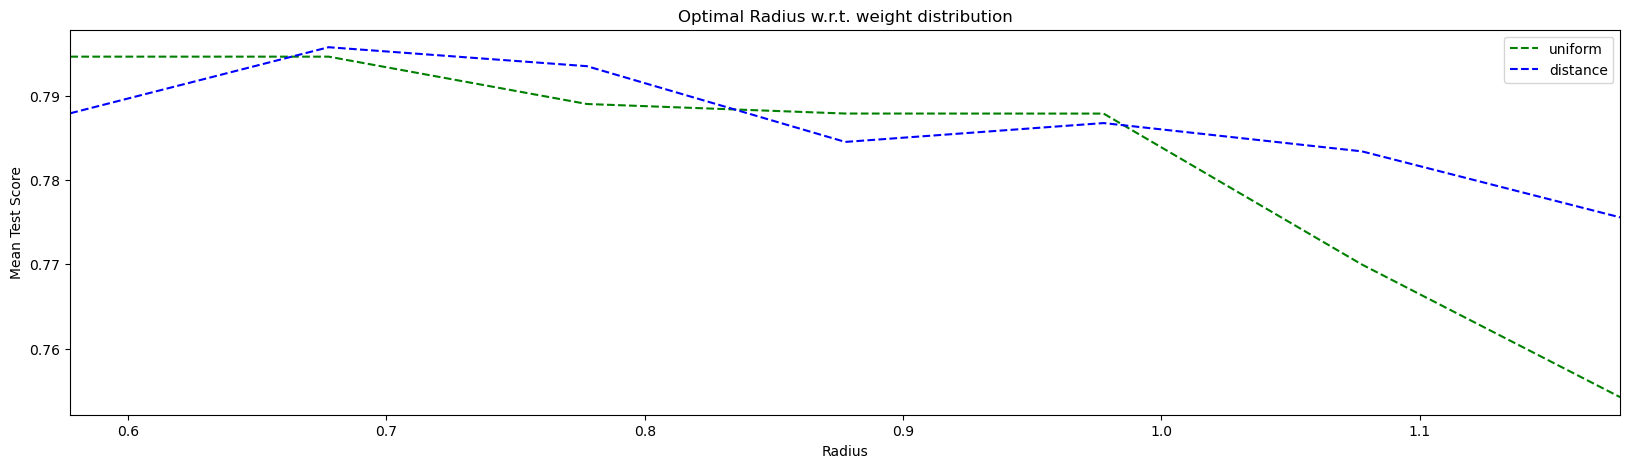

In [9]:
# Choose for different radii
radius_arr = np.arange(0.5776, 1.2, 0.1)  # decimal steps
#radius_arr = range(1,10)  # natural numbers

# Necessary for plotting
length_r_a = len(radius_arr)

k_r_params: Dict[str, List[Any]]
k_r_model: GridSearchCV

# STUDENT CODE HERE (2pt)

weight_options = ['uniform', 'distance']
k_r_params = {"radius": radius_arr, "weights": weight_options}

k_r_model = GridSearchCV(RadiusNeighborsClassifier(), k_r_params, cv=5)
k_r_model.fit(x_train, y_train)

# STUDENT CODE until HERE


## Plot the results

neighourhood_r = k_r_params['radius']
scores_r = k_r_model.cv_results_['mean_test_score']
scores_std_r = k_r_model.cv_results_['std_test_score']

scores_r = np.append(scores_r[0::2], scores_r[1::2])
scores_std_r = np.append(scores_std_r[0::2], scores_std_r[1::2])

plt.figure().set_size_inches(20, 5)
plt.title('Optimal Radius w.r.t. weight distribution')
plt.xlim(neighourhood_r[0],neighourhood_r[-1])
plt.xlabel('Radius')
plt.ylabel('Mean Test Score')
plt.plot(neighourhood_r, scores_r[:length_r_a],'g--',
        label='uniform')
plt.plot(neighourhood_r, scores_r[length_r_a:],'b--',
        label='distance')
plt.legend()

<div class="alert alert-block alert-success">
<b>Task:</b> Change the radius array from using only natural numbers to decimal numbers like 0.6, 0.7.,... (comment out natural numbers line). Be aware that for some radii no neighbors can be found. Adjust the lower bound until there is at least one neighbor found.
</li>
</ul>
</div>

<div class="alert alert-block alert-success">
<b>Question (2pt):</b> Answer the following questions in the block below and indicate which question your answer is referring to:<br>
    
1. What happens if you take a radius of 0?<br>
2. Can you imagine why the model's accuracy stagnates at a certain radius?<br>
3. Why does using decimal numbers instead of only natural numbers make more sense?
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> 

1. When choosing a radius of 0, its impossible to find a nearest neighbor. <br>
2. In the extreme case of an infinite radius, the dataset just classifies everything to the same mean class. This will be the case after a certain radius. At a certain point the classification won't be as focused.<br>
3. We normalized our data to a value range of 0 to 1. We can also see, that the score only gets worse after radius of 1. So we don't need to take big radii into account, we need decimals. <br>
</div>

### 3.2.4 Get the best model

<div class="alert alert-block alert-success">
<b>Task:</b> Get for the RadiusClassifier the best model and its parameters. Print those together with the score.
</li>
</ul>
</div>

In [10]:
# Get the params, and the test score of the best model, print the values
# STUDENT CODE HERE (3pt)

best_radius = k_r_model.best_params_["radius"]
best_weight = k_r_model.best_params_["weights"]
score = k_r_model.best_score_

print(f"Best radius: {best_radius}\n\
Best weight function: {best_weight}\n\
Best Score: {score}\n")

# STUDENT CODE until HERE

Best radius: 0.6776
Best weight function: distance
Best Score: 0.7957253154227607



## 3.3 Compare

<div class="alert alert-block alert-success">
<b>Question (1pt):</b> Answer the following questions in the answer block below and indicate which question your answer is referring to:<br>
    
1. Which model would you take, radius or Conventional Nearest Neighbor and why? Compare therefore the classifiers trained with the best parameter setting and the GridSearchCV results.<br>
2. Are weights in both best models uniform?
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> <br>

1. Nearest Neighbor has a slightly better score of ~0.8 in comparison to the Radius model with ~0.79. The score suggests, that the nearest neighbor model may be better. <br>
2. No, the best nearest neighbor model has distance as weight, only radius model has uniform as weight.
</div>

## 3.4 Visualization

We will take the two features of the training set and look where the decision boundaries are drawn for a KNN trained on them.

In [11]:
def plot_knn(n_neighbors: int, radius: float, f_names: List[str], X: np.ndarray, y: np.ndarray):
    
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000','#0000FF'])
    
    h = .02
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = KNeighborsClassifier(n_neighbors, weights=weights)
        clf_r = RadiusNeighborsClassifier(radius=radius, weights=weights, outlier_label=0)
        clf.fit(X, y)
        clf_r.fit(X,y)
        
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z2 = clf_r.predict(np.c_[xx.ravel(), yy.ravel()])
        
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        Z2 = Z2.reshape(xx.shape)
         
        f,ax = plt.subplots(1,2,figsize=(20,5))
        
        ax[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
        sc1 = ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                    edgecolor='k', s=20)

        ax[0].set_xlim(xx.min(), xx.max())
        ax[0].set_ylim(yy.min(), yy.max())
        ax[0].set_xlabel(f_names[0])
        ax[0].set_ylabel(f_names[1])
        ax[0].set_title(f'K-Nearest Neighbor with (k={n_neighbors}, weights = \'{weights}\')')
        f.colorbar(sc1,ax = ax[0]) 
        
        ax[1].pcolormesh(xx, yy, Z2, cmap=cmap_light)
        sc2 = ax[1].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                    edgecolor='k', s=20)
        
        ax[1].set_xlim(xx.min(), xx.max())
        ax[1].set_ylim(yy.min(), yy.max())
        ax[1].set_xlabel(f_names[0])
        ax[1].set_ylabel(f_names[1])
        ax[1].set_title(f'Radius Neighbors Classifier with (R= {radius:0.3f}, weights = \'{weights}\')')
        f.colorbar(sc1, ax = ax[1]) 
       
    plt.show()

In [12]:
# Reconsider all features we have
x_test.columns

Index(['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Name_length', 'Fare_log',
       'Fare_bin'],
      dtype='object')

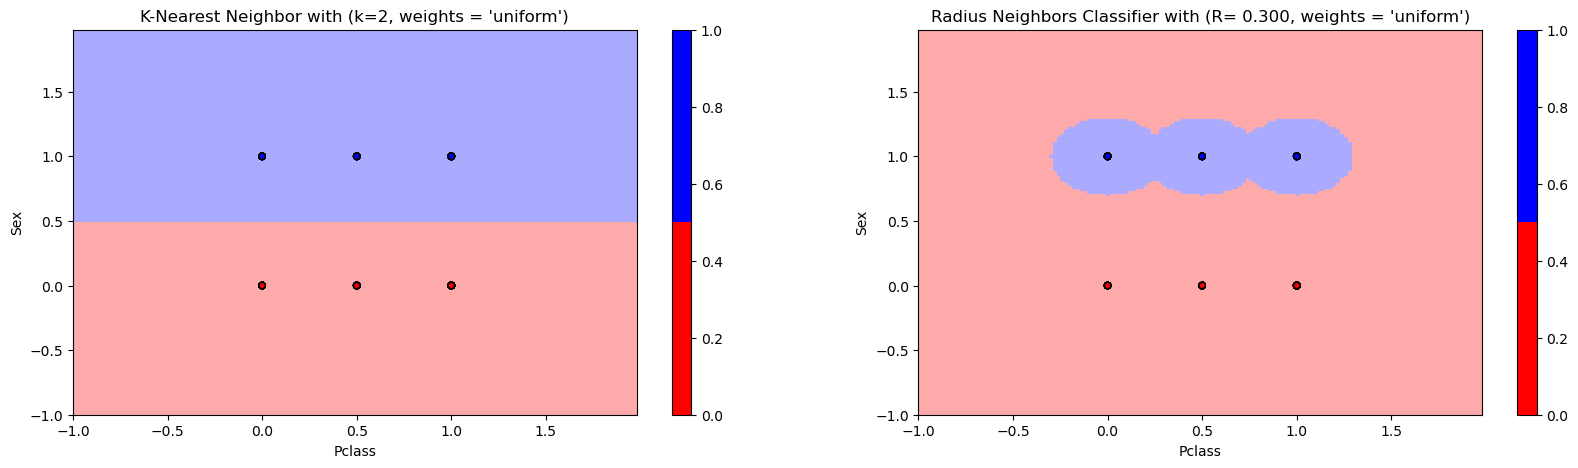

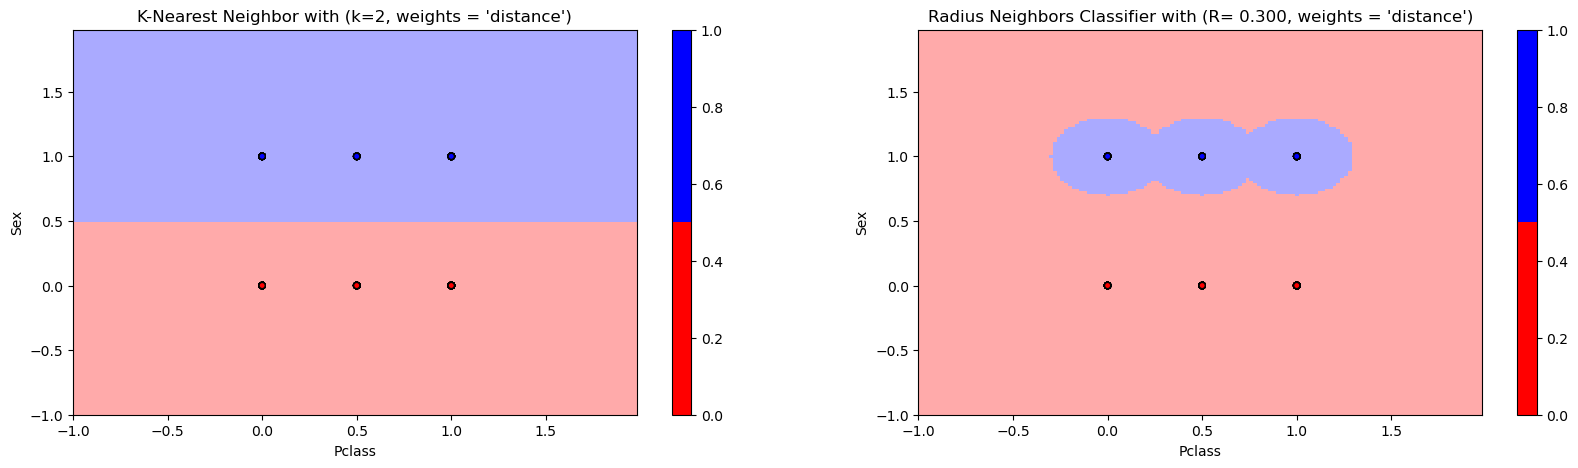

In [13]:
# Choose features to compare
features_compared = ['Pclass', 'Sex']

# Plot them
plot_knn(2, 0.3, features_compared, np.array(x_test[features_compared]), y_test.values)

<div class="alert alert-block alert-success">
<b>Question (1pt):</b> Which features were compared in the default setting?
</div>

<div class="alert alert-block alert-success">
<b>Your Answer: </b>Pclass and Sex 
</div>

<div class="alert alert-block alert-success">
<b>Task:</b> Apply the same visualization to continous features if possible.
</li>
</ul>
</div>

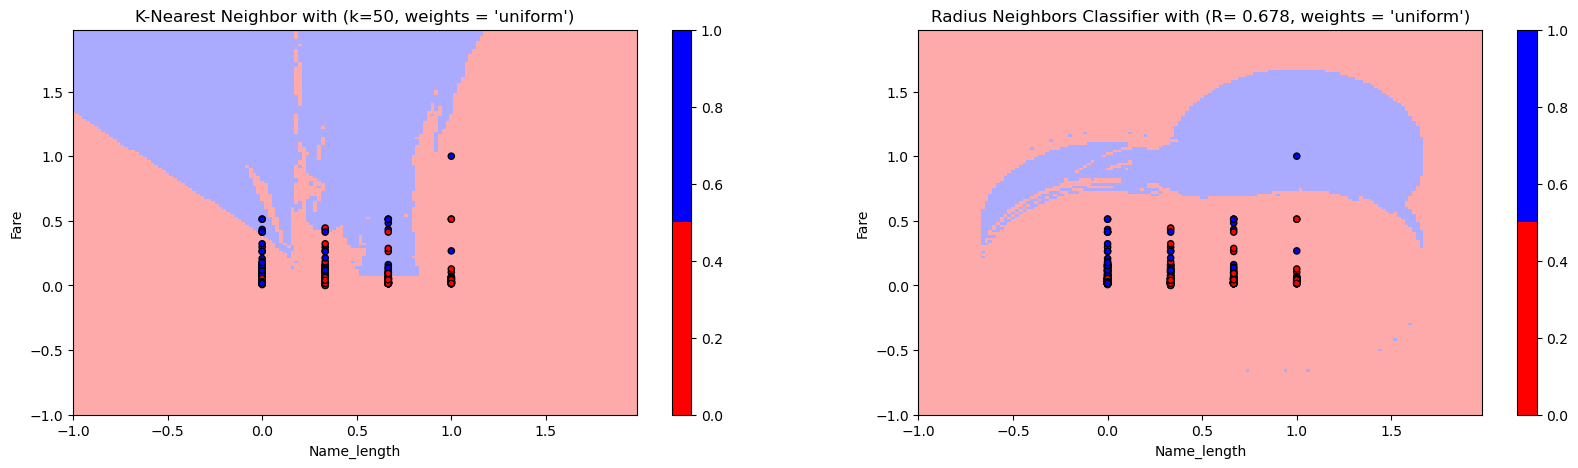

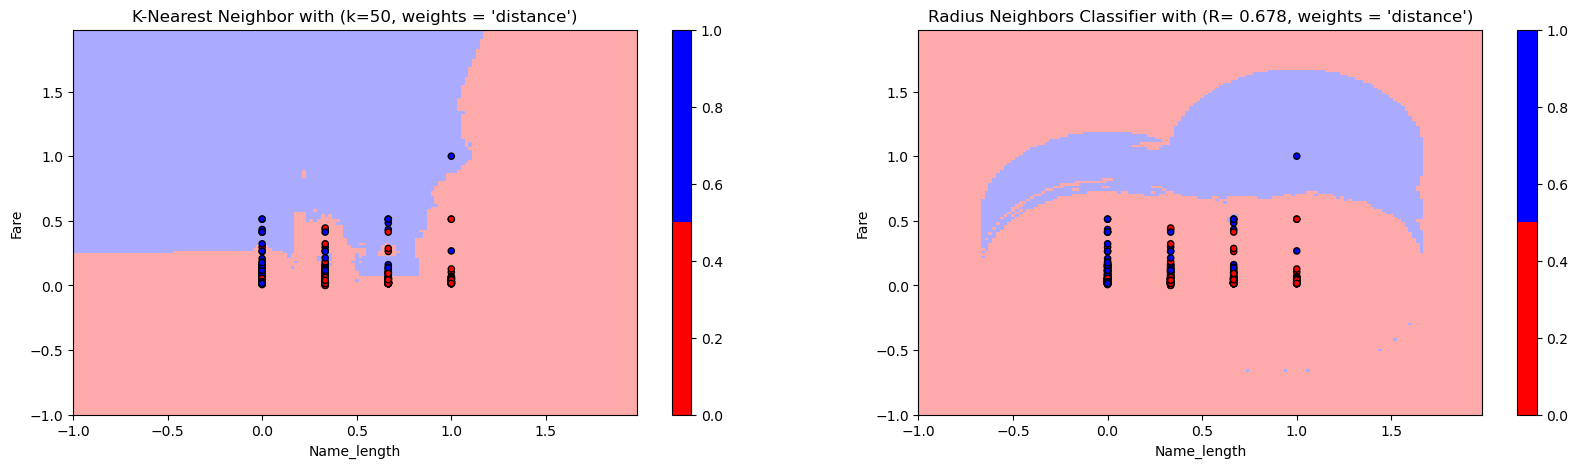

In [14]:
# Choose features to compare
features_compared = ['Name_length', 'Fare']

# Plot them
plot_knn(50, 0.6776, features_compared, np.array(x_test[features_compared]), y_test.values)

<div class="alert alert-block alert-success">
<b>Question (2pt):</b> Answer the following questions in the answer block below and indicate which question your answer is referring to:<br>

1. Why are there in the default setting only 6 points?<br>
2. Are previous determined optimal values for KNN and RNN (via GridSearchCV) reliable for these plots?<br>
3. What happens to the decision boundaries as you increase k? You might change the features to see it.<br>
4. Is it a good idea not to normalize? (Leave out normalization right at the beginning of this Task)<br>
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> 
    
1. Per feature there were only two discrete options, so 2^2=4 points. The points in between are datapoints where these were not classified, so two more points in between. <br>
2. The determined optimal values are calculated with respect to all features. For visualizing and classifying less features, the radii and neighbors may not be appropriate. <br>
3. There are less boundaries for increases values of k and more continuous space in between the boundaries.<br>
4. By normalizing we change the distances between the points, so it would affect the best radius. Normalization is a affine linear operation, so it wouldn't change the relationship between the points. So it shouldn't affect the best nearest neighbor count and only scale the best radius by the scale of the normalization. I think normalization is still a good idea, to ensure compatibility with most data analysis library.
</div>

## 3.5 Visualization by different methods

Below there are used some ways to visualize data in higher dimensions, since we were looking with the knn_plots only at two dimensions.

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import make_blobs

from pandas.plotting import parallel_coordinates

### 3.5.1 Dimensionality Reduction with PCA

Can be used as well for preprocessing purposes (also with K-NNs), but is only used for visualization purposes in here.

In [16]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(x_train))

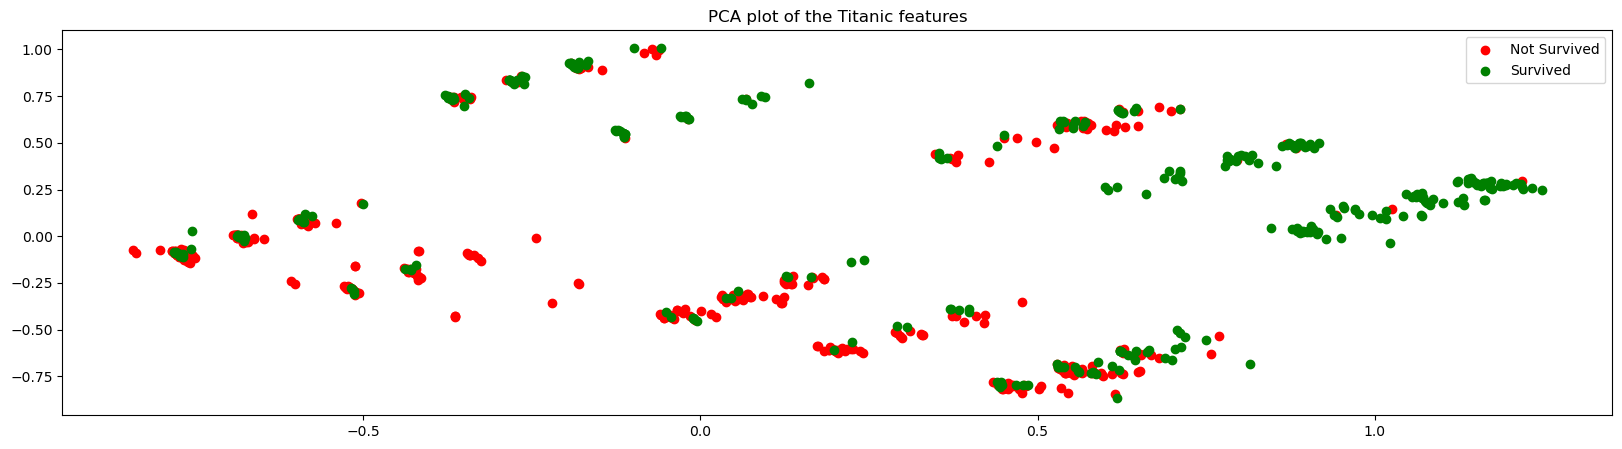

In [17]:
plt.figure(figsize=(20,5))
plt.scatter(transformed[y_train==0][0], transformed[y_train==0][1], label='Not Survived', c='red')
plt.scatter(transformed[y_train==1][0], transformed[y_train==1][1], label='Survived', c='green')
plt.title('PCA plot of the Titanic features')

plt.legend()
plt.show()

### 3.5.2 Parallel Coordinates

One line describes one sample in you data. By looking at 'continuous' values (more than just a handful of discrete values), you can see that long names tended to survive for example.

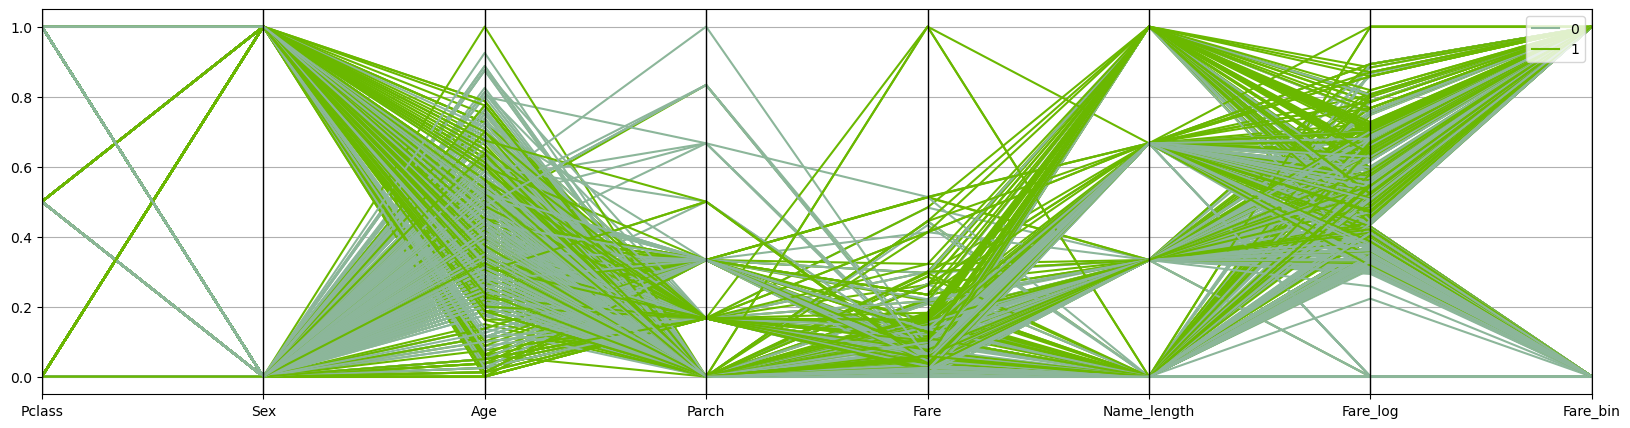

In [18]:
data_norm = pd.concat([x_train, y_train], axis=1)

# Perform parallel coordinate plot
plt.figure(figsize=(20,5))
parallel_coordinates(data_norm, 'Survived')
plt.show()

<div class="alert alert-block alert-success">
<b>Question (1pt):</b>  What happens if the data is not normalized in these methods? Check by yourself.
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> It leads to features with larger numerical values to disproportionally affect the plot. This may lead to misleading interpretations.
</div>

See also: http://www.apnorton.com/blog/2016/12/19/Visualizing-Multidimensional-Data-in-Python/

# Further Reading


- Bagging
- Logistic Regression
- Random Forests
- Combination of Bagging and GridSearchCV

# Feedback and Recap

<div class="alert alert-block alert-success">
<b>Question (3pt):</b>  Please conclude in a few sentences what you learned in this exercise
</div>

<div class="alert alert-block alert-success">
<b>Your Answer: </b>We have taken a look at methods for classifying data in many dimensions, for example nearest neighbor and radius classifiers. Also we worked out methods to use them with their best parameters as possible and finally how to visualize the data analysis. 
</div>

## And give us feedback if you like


1) Do you think this task was designed well? 

2) Where can we improve this task?

<strong>Thanks for participating in LAMA! :)</strong>